### Comparative Analysis plots

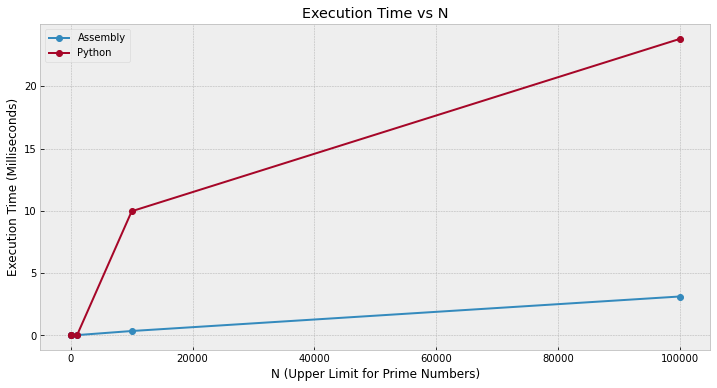

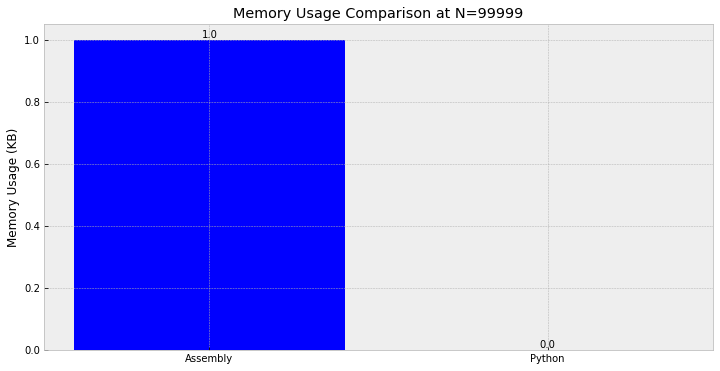

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
from memory_profiler import memory_usage
plt.style.use("bmh")


# Defining the Sieve of Eratosthenes function
def SieveOfEratosthenes(num):
    sieve = [True for i in range(num+1)]
    p = 2
    while (p * p <= num):
        if (sieve[p] == True):
            for i in range(p * p, num+1, p):
                sieve[i] = False
        p += 1

# Measuring execution time
def measure_time_only(n):
    start_time = datetime.now()
    SieveOfEratosthenes(n)
    end_time = datetime.now()
    time_taken = (end_time - start_time).total_seconds() * 1000  # Convertion to milliseconds
    return time_taken

# Function to measure memory usage
def measure_memory_usage(n):
    mem_usage = memory_usage((SieveOfEratosthenes, (n,)), interval=0.02, timeout=1)
    return max(mem_usage) - min(mem_usage)  # Memory usage in MB

results_time = {
    99999: 3.128,
    9999: 0.358,
    999: 0.029,
    99: 0.053,
    9: 0.018
}
memory_usage_kb = 1  # Total memory usage in KB for Assembly

# Python results
python_results_time = {n: measure_time_only(n) for n in results_time.keys()}
python_memory_usage_mb = measure_memory_usage(99999)  # Memory usage in MB

# Plotting execution time comparison
plt.figure(figsize=(12, 6))
plt.plot(results_time.keys(), results_time.values(), marker='o', label='Assembly')
plt.plot(python_results_time.keys(), python_results_time.values(), marker='o', label='Python')
plt.title('Execution Time vs N')
plt.xlabel('N (Upper Limit for Prime Numbers)')
plt.ylabel('Execution Time (Milliseconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting memory usage comparison 
python_memory_usage_kb = python_memory_usage_mb * 1024  # Convert MB to KB
fig, ax = plt.subplots(figsize=(12, 6))
bar_plot = ax.bar(['Assembly', 'Python'], [memory_usage_kb, python_memory_usage_kb], color=['blue', 'orange'])

# Adding value labels on the bar chart
for bar in bar_plot:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Memory Usage Comparison at N=99999')
plt.ylabel('Memory Usage (KB)')
plt.show()
